# Classifications MACHINE LEARNIG MODEL

![](https://www.studytrigger.com/wp-content/uploads/2023/04/Types-of-Leaning-in-Machine-Learning.png)

# SUPERVISED LEARNING
  # 1.REGRESSION
  - LINEAR MODEL  
      - LINEAR REGRESSION
  - NON LINEAR MODEL
    - SVM
    - DECISIION TREE
    - KNN
    - ENSEMBLE TECHNIQUES RANDOM FOREST
  
# 2. CLASSIFICATION
    - LINEAR MODEL  
      - LOGISTIC REGRESSION
  - NON LINEAR MODEL
    - SVM
    - DECISIION TREE
    - KNN
    - ENSEMBLE TECHNIQUES RANDOM FOREST

# Introduction to Classification - INSURANCE FRAUD CLAIM

# Predicting auto and insurance fraud in general:
is a contract, represented by a policy, in which an individual or entity receives financial protection or reimbursement against losses from an insurance company. The company pools clients' risks to make payments more affordable for the insured.

# Insurance Policy Components
When choosing a policy, it is important to understand how insurance works.

A firm understanding of these concepts goes a long way in helping you choose the policy that best suits your needs. For instance, whole life insurance may or may not be the right type of life insurance for you. There are three components of any type of insurance (premium, policy limit, and deductible) that are crucial.



1. Introduction to Logistic Regression
2. Linear Regesssion
3. Sigmoid Function
4. loss functions
5. Confusion Matrix
6. Classification Evaluation Metrics

https://www.kaggle.com/code/mohamedbakrey/make-a-prediction-for-insurance-claim-report

https://youtu.be/ntBa7YKc9XM?si=1V1RL0wCmxM_gjor  Regression price

https://youtu.be/OOLhKLXCJiU?si=dWxvFk82mVO8WxEP DBSCAN

> The goal of this note, Kuho Hwa, is to make a simplified and structured analysis to make an explanation of that dirty process called fraud and lack of it through analysis and the machine learning system.

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/0.self_course_content_data_science/10.machine learning/Module 4.2 insurance_claims_report.csv"
db = pd.read_csv(path)
# db=pd.read_csv('Module 4.2 insurance_claims_report.csv')
# https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fcode%2Fmohamedbakrey%2Fmake-a-prediction-for-insurance-claim-report

In [7]:
db.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17/10/14,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27/06/06,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,18,687698,06/09/00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25/05/90,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06/06/14,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12/10/06,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04/06/00,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03/02/90,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05/02/97,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25/07/11,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [8]:
db.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
db.shape

(1000, 39)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
db.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [ ]:
db["authorities_contacted"].mode()

,authorities_contacted
0,Police


In [ ]:
db["authorities_contacted"].fillna(db["authorities_contacted"].mode()[0], inplace=True)

/tmp/ipython-input-2906258635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db["authorities_contacted"].fillna(db["authorities_contacted"].mode()[0], inplace=True)


In [ ]:
db.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
db.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.937000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.158871,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,18.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
db.count()

,0
months_as_customer,1000
age,1000
policy_number,1000
policy_bind_date,1000
policy_state,1000
policy_csl,1000
policy_deductable,1000
policy_annual_premium,1000
umbrella_limit,1000
insured_zip,1000


In [ ]:
# output window size can be customize base on rows ,columns
pd.set_option('display.max_columns', 40)
db

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17/10/14,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25/01/15,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27/06/06,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21/01/15,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,18,687698,06/09/00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22/02/15,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25/05/90,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10/01/15,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06/06/14,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17/02/15,Vehicle Theft,?,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16/07/91,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22/02/15,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05/01/14,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24/01/15,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17/02/03,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23/01/15,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18/11/11,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26/02/15,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
# customer wise data show in rows level
db.transpose().iloc[:,:5]

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,18,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,17/10/14,27/06/06,06/09/00,25/05/90,06/06/14
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


In [ ]:
# row wise show the stats summary
db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.893700e+01,9.158871e+00,18.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


## Visalizations for data for analysis

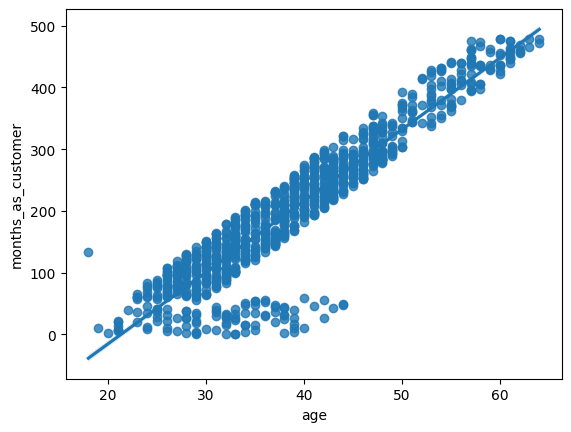

In [ ]:
# check the realtionship beween age and customers years
ax=sns.regplot(x='age',y='months_as_customer',data=db)

age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
32    38
40    38
29    34
46    33
44    32
42    32
35    32
36    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
49    14
55    14
25    14
50    13
53    13
24    10
61    10
54    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
18     1
19     1
20     1
22     1
Name: count, dtype: int64


<Axes: xlabel='age'>

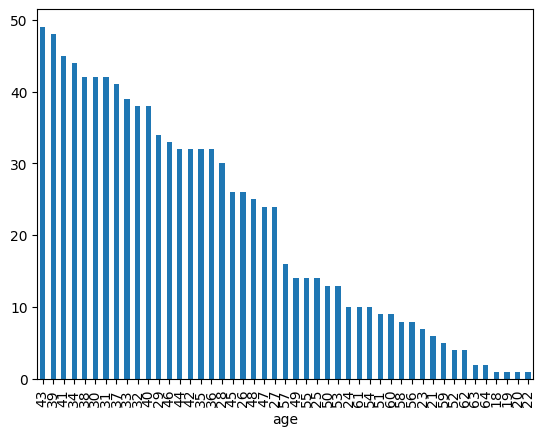

In [ ]:
# which age groups customers are in our insurance
p = db['age'].value_counts()
print(p)
db['age'].value_counts().plot.bar()

months_as_customer
194    8
285    7
254    7
101    7
128    7
      ..
372    1
213    1
240    1
50     1
17     1
Name: count, Length: 391, dtype: int64


<Axes: xlabel='months_as_customer'>

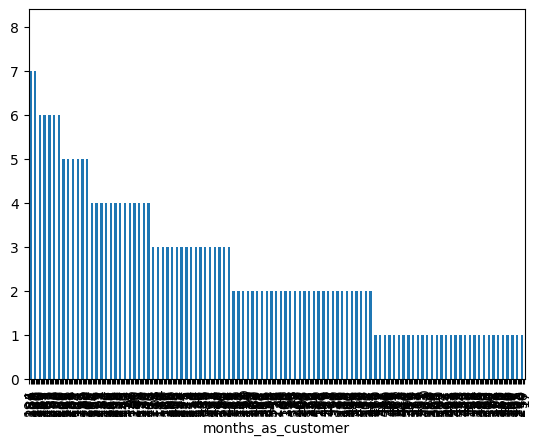

In [ ]:
p = db['months_as_customer'].value_counts()
print(p)
db['months_as_customer'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='count'>

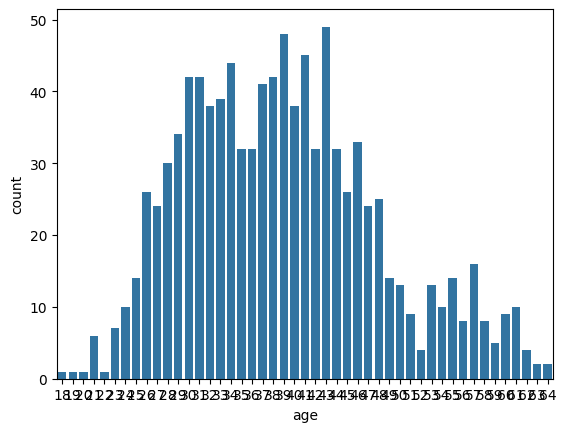

In [ ]:
sns.countplot(data=db, x='age')

Text(0.5, 0, 'age')

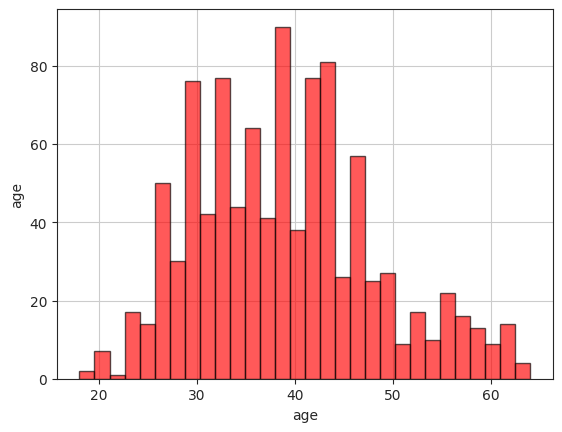

In [ ]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
db['age'].hist(bins=30, color = "red", edgecolor='black', alpha=0.65, lw=1.5)
plt.ylabel('age')
plt.xlabel('age')


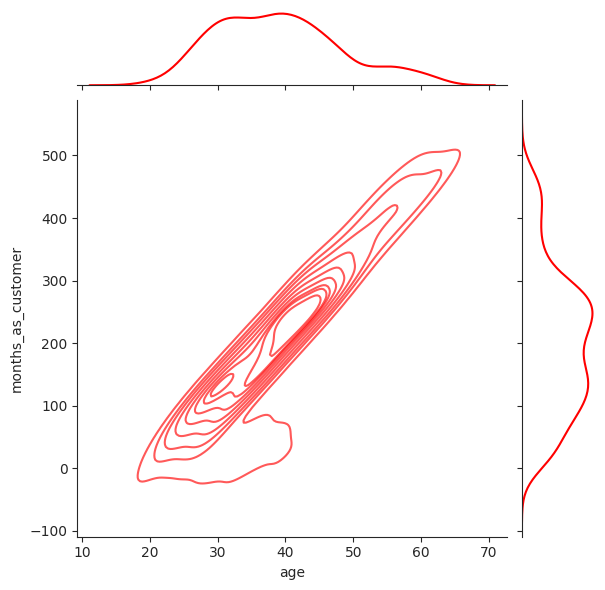

In [ ]:
sns.jointplot(x = 'age', y = 'months_as_customer',
              data = db, kind = 'kde', color = "red", alpha = 0.65)

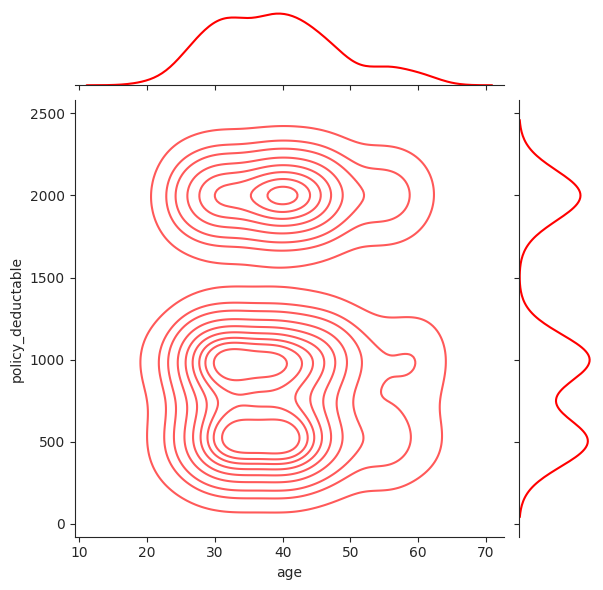

In [ ]:
sns.jointplot(x = 'age', y = 'policy_deductable',
              data = db, kind = 'kde', color = "red", alpha = 0.65)

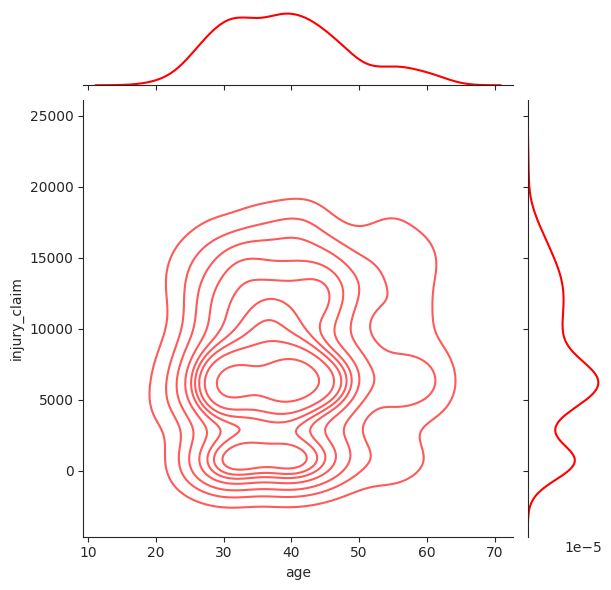

In [ ]:

sns.jointplot(x = 'age', y = 'injury_claim',
              data = db, kind = 'kde', color = "red", alpha = 0.65)

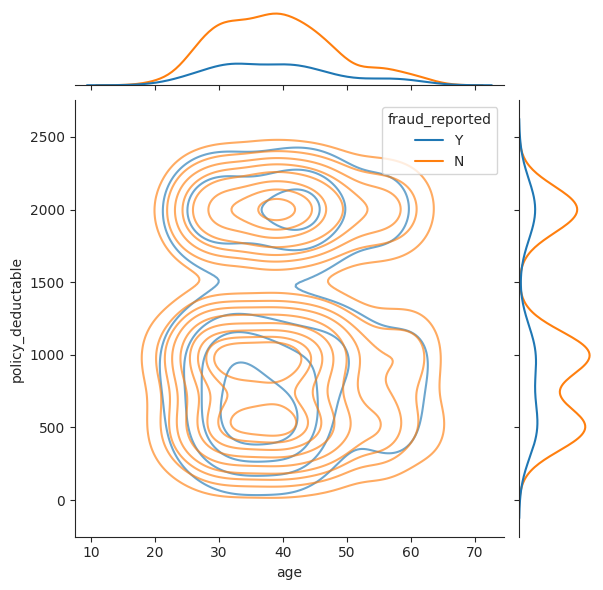

In [ ]:
sns.jointplot(x = 'age', y ='policy_deductable',
              data = db,hue = 'fraud_reported',kind = 'kde', color = "red", alpha = 0.65)

In [ ]:
# sns.pairplot(db, hue = 'fraud_reported', palette = 'cool_r')


- Before apply models , we need to check the data quality and data preprocessing.
    - We need to check the data for missing values, outliers, and data types.
    - We need to handle missing values by either removing them or imputing them with a suitable
    method.
    - We need to transform the data into a suitable format for modeling, such as scaling or encoding
    categorical variables.
    - We need to split the data into training and testing sets to evaluate the model's performance.

# Let's apply our classification models one by one:
1) Logistic Regression:

In [ ]:
# check how many columns --> so i decide which columns are important
db.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
# if we use numberical + some categorical import fetures
X = db[['months_as_customer', 'age', 'policy_annual_premium',
       'insured_education_level', 'auto_year', 'fraud_reported', 'property_damage',
       'umbrella_limit', 'incident_hour_of_the_day', 'incident_severity', 'authorities_contacted']]
y = db['fraud_reported']

#  if you are using all columns  do EDA or preprocessing

In [ ]:
# if use only numerical columns for training
X = db[["months_as_customer","age","policy_annual_premium","auto_year" ,"umbrella_limit"]]

In [ ]:
# Replace NaN values with the mean of each column
X = X.fillna(X.mean())

# Verify that there are no more missing values
print(X.isnull().sum())

months_as_customer       0
age                      0
policy_annual_premium    0
auto_year                0
umbrella_limit           0
dtype: int64


In [ ]:
X

,months_as_customer,age,policy_annual_premium,auto_year,umbrella_limit
0,328,48,1406.91,2004,0
1,228,42,1197.22,2007,5000000
2,134,18,1413.14,2007,5000000
3,256,41,1415.74,2014,6000000
4,228,44,1583.91,2009,6000000
...,...,...,...,...,...
995,3,38,1310.80,2006,0
996,285,41,1436.79,2015,0
997,130,34,1383.49,1996,3000000
998,458,62,1356.92,1998,5000000


In [ ]:
y

,fraud_reported
0,Y
1,Y
2,N
3,Y
4,N
...,...
995,N
996,N
997,N
998,N


In [ ]:
X.shape

(1000, 5)

In [ ]:
# import methods
from sklearn.model_selection import train_test_split

In [ ]:
#  split the data into training and tsting
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [ ]:
X_train.shape

(700, 5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
len(X_test)

300

In [ ]:
# check the accuracy  of model
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
y_pred = pipe.predict(X_test)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))



Accuracy: 0.7466666666666667


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[224   0]
 [ 76   0]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.85       224
           Y       0.00      0.00      0.00        76

    accuracy                           0.75       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.56      0.75      0.64       300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


![](https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c42677529a0f4e97e4f9c_644aec2628bc14d83ca873a2_class_guide_cm10.png)
![](https://almablog-media.s3.ap-south-1.amazonaws.com/image_14_4f4fc2cf7d.png)

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/07/sdfgvb-01-1-scaled.webp)

![](https://i.ytimg.com/vi/FvIjv9-Xx1o/maxresdefault.jpg)

![](https://framerusercontent.com/images/1NNVbuTCbyaX2tWbtyErU4vFpOk.webp?width=1531&height=566)


Here’s the step-by-step from your confusion matrix
(rows = actual \[N, Y], cols = predicted \[N, Y]):

```
[[220, 0],
 [ 80, 0]]
```

* For class **Y** as the “positive” class:

  * TP = 0  (actual Y, predicted Y)
  * FP = 0  (actual N, predicted Y)
  * FN = 80 (actual Y, predicted N)
  * TN = 220 (actual N, predicted N)

### Per-class metrics

**Class Y**

* Precision\_Y = TP/(TP+FP) = 0/(0+0) → undefined → sklearn reports **0.00**
* Recall\_Y = TP/(TP+FN) = 0/(0+80) = **0.00**
* F1\_Y = 0 (since precision or recall is 0)

**Class N** (one-vs-rest view, treat N as “positive”)

* TP\_N = 220, FP\_N = 80, FN\_N = 0, TN\_N = 0
* Precision\_N = 220/(220+80) = **0.7333 ≈ 0.73**
* Recall\_N = 220/(220+0) = **1.00**
* F1\_N = 2\*(0.7333\*1)/(0.7333+1) = **0.846 ≈ 0.85**

### Overall metrics

* **Accuracy** = (TP+TN)/(total) = (0+220)/300 = **0.733 ≈ 0.73**

* **Macro avg** (simple mean of classes)

  * Precision = (0.7333 + 0)/2 = **0.3667 ≈ 0.37**
  * Recall = (1.0 + 0)/2 = **0.50**
  * F1 = (0.846 + 0)/2 = **0.423 ≈ 0.42**

* **Weighted avg** (weighted by support: 220 for N, 80 for Y)

  * Precision = (0.7333*220 + 0*80)/300 = **0.537 ≈ 0.54**
  * Recall = (1.0*220 + 0*80)/300 = **0.733 ≈ 0.73**
  * F1 = (0.846*220 + 0*80)/300 = **0.620 ≈ 0.62**

That matches your `classification_report`. The key confusion point: for class **Y** there are **no predicted positives**, so precision is 0/0 (undefined) and sklearn returns **0.00**.


In [ ]:
import pickle
filename = 'logistic_model.pkl'

pickle.dump(pipe, open(filename, 'wb'))

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty="l2",solver="liblinear",C=.5))

pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.5, solver='liblinear'))])

## Stream_lit code

In [ ]:
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
filename = 'logistic_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

st.title("Insurance Claim Fraud Prediction")

st.write("""
This app predicts whether an insurance claim is fraudulent based on several factors.
""")

# Define input fields for numerical features
months_as_customer      = st.number_input('Months as Customer', min_value=0, max_value=500, value=100)
age                     = st.number_input('Age', min_value=18, max_value=100, value=30)
policy_annual_premium   = st.number_input('Policy Annual Premium', min_value=0.0, max_value=2500.0, value=1000.0)
auto_year               = st.number_input('Auto Year', min_value=1980, max_value=2023, value=2010)
umbrella_limit          = st.number_input('Umbrella Limit', min_value=-10000000, max_value=10000000, value=0)


# Create a button to make a prediction
if st.button('Predict Fraud'):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame({
        'months_as_customer': [months_as_customer],
        'age': [age],
        'policy_annual_premium': [policy_annual_premium],
        'auto_year': [auto_year],
        'umbrella_limit': [umbrella_limit]
      })

    # Select only the numerical columns used for prediction based on the original code
    numerical_cols_for_prediction = ['months_as_customer', 'age', 'policy_annual_premium', 'auto_year', 'umbrella_limit']
    input_data_for_prediction = input_data[numerical_cols_for_prediction]

    # Make the prediction
    prediction = loaded_model.predict(input_data_for_prediction)

    # Display the prediction
    if prediction[0] == 'Y':
        st.write("Prediction: Fraud Reported (Y)")
    else:
        st.write("Prediction: No Fraud Reported (N)")



ModuleNotFoundError: No module named 'streamlit'


- Underfitting and Overfitting
- bias variance
- bias -variance tradeoff
- Regularization
- Cross Validation

### 🧠 **1. Underfitting**

**Definition:**
Underfitting happens when a model is **too simple** to capture the underlying patterns in the data.

**Example:**
Trying to fit a straight line (linear regression) to data that actually follows a curve (nonlinear relationship).

**Symptoms:**

* High training error
* High test error
* Model fails to capture important trends in the data

**Causes:**

* Model is not complex enough (e.g., using linear regression for complex data)
* Too few features
* Too much regularization (penalizing the model excessively)

**Solutions:**

* Use a more complex model
* Add more relevant features
* Reduce regularization
* Train longer or tune hyperparameters

---

### 🎯 **2. Overfitting**

**Definition:**
Overfitting happens when a model is **too complex** and learns **noise or random fluctuations** in the training data instead of the true underlying pattern.

**Example:**
A decision tree that perfectly classifies training data but performs poorly on new (test) data.

**Symptoms:**

* Very low training error
* High test error
* Model performs well on training data but poorly on unseen data

**Causes:**

* Model is too complex (too many parameters)
* Too little training data
* Noisy data
* Lack of regularization

**Solutions:**

* Use a simpler model
* Add more training data
* Use regularization (L1, L2, dropout, etc.)
* Use cross-validation
* Apply data augmentation (for images, text, etc.)

---

### 📊 **Visual Summary**

| Aspect           | Underfitting        | Overfitting                       |
| ---------------- | ------------------- | --------------------------------- |
| Model complexity | Too simple          | Too complex                       |
| Training error   | High                | Very low                          |
| Test error       | High                | High                              |
| Generalization   | Poor                | Poor                              |
| Solution         | Increase complexity | Decrease complexity or regularize |

---


https://www.geeksforgeeks.org/machine-learning/underfitting-and-overfitting-in-machine-learning/

![](https://www.mathworks.com/discovery/overfitting/_jcr_content/mainParsys/image.adapt.full.medium.svg/1746469504474.svg)

https://medium.com/@sharvenrane7/popular-regression-models-in-machine-learning-449ab77c7ba1

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IzhAVzMGn83UN5-vozS7jw.png)

## Extra Models  implemetations in upcoming



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("Module 4.2 insurance_claims_report.csv")
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Features and target
X = df[["months_as_customer", "age", "policy_annual_premium", "auto_year", "umbrella_limit"]]
y = df["fraud_reported"]

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Y -> 1, N -> 0

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Neural Network (MLP)": MLPClassifier(max_iter=500)
}

# Train & evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"{name}:\nAccuracy = {acc:.2f}")
    print("=======================")